In [1]:
def fill_na_mid (val):
    val.fillna(val.median(),inplace=True)

In [8]:
!pip install xgboost

Traceback (most recent call last):
  File "/usr/bin/pip", line 10, in <module>
    from pip._internal import main as _main
ImportError: No module named _internal


In [2]:
import pandas as pd
import os

lab_data = '/data/share/lab04data'

train = pd.read_csv(os.path.join(lab_data,'lab04_train.csv'))
test = pd.read_csv(os.path.join(lab_data,'lab04_test.csv'))
train.dropna(subset=['TARGET'],inplace=True)
train['type'] = 'train'
test['type'] = 'test'
tt=pd.concat([train,test],sort=False)

In [60]:
tt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,365162.0,222072.684321,128180.509690,0.000000e+00,111043.250000,222113.500000,333082.500000,4.439870e+05
ID,365162.0,368913.684321,128180.509690,1.468410e+05,257884.250000,368954.500000,479923.500000,5.908280e+05
CR_PROD_CNT_IL,365162.0,0.105123,0.429112,0.000000e+00,0.000000,0.000000,0.000000,1.100000e+01
AMOUNT_RUB_CLO_PRC,325818.0,0.044164,0.108928,0.000000e+00,0.000000,0.000000,0.036823,1.000000e+00
PRC_ACCEPTS_A_EMAIL_LINK,159328.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
APP_REGISTR_RGN_CODE,62375.0,50.978902,21.761274,0.000000e+00,33.000000,54.000000,72.000000,8.900000e+01
PRC_ACCEPTS_A_POS,159328.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
PRC_ACCEPTS_A_TK,159328.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
TURNOVER_DYNAMIC_IL_1M,365162.0,0.001305,0.029076,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_TRAN_AUT_TENDENCY1M,79202.0,0.416003,0.315704,6.944444e-03,0.166667,0.300000,0.571429,1.000000e+00


In [3]:
#clean
tt_cln=tt
tt_cln=tt_cln.drop(columns=['ID','Unnamed: 0'])

tt_cln.CLNT_TRUST_RELATION.replace(['SISTER','BROTHER','Брат','Сестра',
                                    'MOTHER', 'FATHER','Мать','Отец','мать','мама',
                                    'Близкий ро',
                                    'Жена','Муж',
                                    'SON','DAUGHTER','Сын','Дочь'],'FAMILY',inplace=True)

tt_cln.CLNT_TRUST_RELATION.replace(['FRIEND','Друг', 'OTHER','Дальний ро'],'OTHER',inplace=True)
#
tt_cln.CLNT_TRUST_RELATION.fillna('NONE',inplace=True)
tt_cln.APP_POSITION_TYPE.fillna('NONE',inplace=True)
tt_cln.CLNT_JOB_POSITION_TYPE.fillna('NONE',inplace=True)
tt_cln.APP_CAR = tt_cln.APP_CAR.fillna(0.5).replace('Y',1).replace('N',0)
tt_cln.APP_TRAVEL_PASS = tt_cln.APP_TRAVEL_PASS.fillna(0.5).replace('Y',1).replace('N',0)

fill_na_mid(tt_cln.TRANS_AMOUNT_TENDENCY3M)
fill_na_mid(tt_cln.TRANS_CNT_TENDENCY3M)
fill_na_mid(tt_cln.TRANS_COUNT_ATM_PRC)
fill_na_mid(tt_cln.TRANS_COUNT_NAS_PRC)
fill_na_mid(tt_cln.TRANS_COUNT_SUP_PRC)
#0.829
tt_cln.APP_DRIVING_LICENSE = tt_cln.APP_DRIVING_LICENSE.fillna(0.5).replace('Y',1).replace('N',0)
#tt_cln.APP_EDUCATION=tt_cln.APP_EDUCATION.str.upper().fillna('NONE')
#0.8297

#tt_cln.APP_EMP_TYPE = tt_cln.APP_EMP_TYPE.fillna('NONE')
#tt_cln.APP_KIND_OF_PROP_HABITATION = tt_cln.APP_KIND_OF_PROP_HABITATION.fillna('NONE')

#tt_cln.APP_MARITAL_STATUS=tt_cln.APP_MARITAL_STATUS.str.upper().fillna('Z')
#tt_cln.APP_MARITAL_STATUS.replace([' '],'Z',inplace=True)
#tt_cln.APP_MARITAL_STATUS.replace(['D','N','W'],'S',inplace=True)


#tt_cln['LDEAL_ACT_DAYS'] = \
#    tt_cln.filter(['LDEAL_ACT_DAYS_ACC_PCT_AVG','LDEAL_ACT_DAYS_PCT_AAVG','LDEAL_ACT_DAYS_PCT_CURR','LDEAL_ACT_DAYS_PCT_TR','LDEAL_ACT_DAYS_PCT_TR3','LDEAL_ACT_DAYS_PCT_TR4']
#                  , axis = 1).sum(axis = 1, skipna = True)

tt_cln=pd.get_dummies(tt_cln,columns=['PACK','APP_POSITION_TYPE','CLNT_JOB_POSITION_TYPE','CLNT_TRUST_RELATION'])
tt_cln=tt_cln.drop(columns=['CLNT_TRUST_RELATION_NONE','CLNT_JOB_POSITION_TYPE_NONE','APP_POSITION_TYPE_NONE'])

#
#fill_na_mid(tt_cln.AMOUNT_RUB_CLO_PRC)
#


#tt_cln
#
tt_cut=tt_cln.dropna(axis='columns',thresh=360000)

In [11]:
#tt_cut=tt.drop(columns=['ID','Unnamed: 0','PACK','CLNT_TRUST_RELATION'])
#tt_cut.fillna(0)
tt_cut.columns

Index(['CR_PROD_CNT_IL', 'TURNOVER_DYNAMIC_IL_1M', 'REST_DYNAMIC_FDEP_1M',
       'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR',
       'APP_DRIVING_LICENSE', 'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC',
       'APP_TRAVEL_PASS', 'CR_PROD_CNT_TOVR', 'APP_CAR', 'CR_PROD_CNT_PIL',
       'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'TURNOVER_PAYM', 'AGE',
       'CR_PROD_CNT_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M',
       'CR_PROD_CNT_CCFP', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM',
       'LDEAL_GRACE_DAYS_PCT_MED', 'REST_DYNAMIC_CUR_3M',
       'TURNOVER_DYNAMIC_CUR_1M', 'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_IL_3M',
       'TURNOVER_DYNAMIC_IL_3M', 'REST_DYNAMIC_PAYM_1M',
       'TURNOVER_DYNAMIC_CUR_3M', 'CLNT_SETUP_TENOR',
       'TURNOVER_DYNAMIC_PAYM_3M', 'TURNOVER_DYNAMIC_PAYM_1M',
       'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M', 'REST_DYNAMIC_CC_1M',
       'TURNOVER_DYNAMIC_CC_1M', 'REST_DYNAMIC_CC_3M',
       'TURNOVER_DYNAMIC_CC_3M', 'type', 'PACK_101', 

In [172]:
##test
#tt_cln=tt
#tt_cut=tt_cln
##tt_cut=tt_cut.dropna(axis='columns',thresh=330000)
#tt_cut=tt_cut.filter(['APP_CAR','type'], axis=1)
#
#fill_na_mid(tt_cut)

In [4]:
train_cut=tt_cut[tt_cut.type=='train'].drop(columns=['type'])
test_cut=tt_cut[tt_cut.type=='test'].drop(columns=['type'])

In [5]:
y=train['TARGET']


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(train_cut,y,test_size=0.2)

In [ ]:
#GradientBoostingClassifier

In [18]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=400, max_depth=5)
model.fit(x_train, y_train)
predict = model.predict_proba(x_test)

CPU times: user 42min 35s, sys: 2min 37s, total: 45min 12s
Wall time: 10min 58s


In [ ]:
#XGBClassifier

In [9]:
%%time
from xgboost import XGBClassifier
param={'max_depth':5, 'silent':1, 'objective': 'binary:logistic','colsample_bytree':0.7,'subsample':0.7,'min_child_weight':5}
param['nthread'] = 8
param['eval_metric'] = 'error'
param['n_estimators'] = 400
param['learning_rate'] = 0.1
model = XGBClassifier(**param)
model.fit(x_train, y_train)
predict = model.predict_proba(x_test)

CPU times: user 6min 24s, sys: 7.06 s, total: 6min 31s
Wall time: 49.1 s


0.8481201818414588


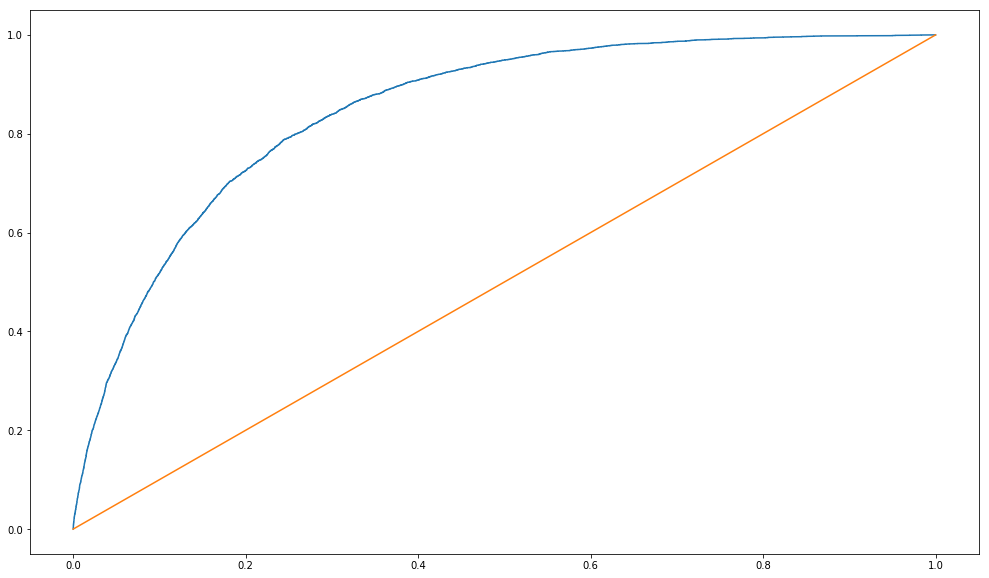

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
from random import random
%matplotlib inline
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(y_test, predict[:,1]))

In [ ]:
#lgb version

In [24]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [36]:
%%time
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
lgb_train = lgb.Dataset(x_train,y_train)
lgb_eval = lgb.Dataset(x_test,y_test,reference=lgb_train)

# specify your configurations as a dict

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'n_estimators': 800,
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train (params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5)
gbm.save_model('model4s.txt')

/opt/anaconda/envs/bd9/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 0.074636	valid_0's l1: 0.149409
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0739971	valid_0's l1: 0.148733
[3]	valid_0's l2: 0.0736138	valid_0's l1: 0.148318
[4]	valid_0's l2: 0.0730524	valid_0's l1: 0.147679
[5]	valid_0's l2: 0.0725869	valid_0's l1: 0.147137
[6]	valid_0's l2: 0.072087	valid_0's l1: 0.146551
[7]	valid_0's l2: 0.0716305	valid_0's l1: 0.145988
[8]	valid_0's l2: 0.0712468	valid_0's l1: 0.145497
[9]	valid_0's l2: 0.0708617	valid_0's l1: 0.144989
[10]	valid_0's l2: 0.0705325	valid_0's l1: 0.144538
[11]	valid_0's l2: 0.0702406	valid_0's l1: 0.144096
[12]	valid_0's l2: 0.0699516	valid_0's l1: 0.143639
[13]	valid_0's l2: 0.0696703	valid_0's l1: 0.143184
[14]	valid_0's l2: 0.0693995	valid_0's l1: 0.142735
[15]	valid_0's l2: 0.0691654	valid_0's l1: 0.142343
[16]	valid_0's l2: 0.0689521	valid_0's l1: 0.14196
[17]	valid_0's l2: 0.0687487	valid_0's l1: 0.141581
[18]	valid_0's l2: 0.0685916	valid_0's l1: 0.141323
[19]	valid_0's 

[165]	valid_0's l2: 0.0640636	valid_0's l1: 0.130903
[166]	valid_0's l2: 0.064055	valid_0's l1: 0.130888
[167]	valid_0's l2: 0.0640457	valid_0's l1: 0.130881
[168]	valid_0's l2: 0.0640397	valid_0's l1: 0.130871
[169]	valid_0's l2: 0.0640332	valid_0's l1: 0.130854
[170]	valid_0's l2: 0.0640234	valid_0's l1: 0.130848
[171]	valid_0's l2: 0.0640169	valid_0's l1: 0.130842
[172]	valid_0's l2: 0.0640111	valid_0's l1: 0.130841
[173]	valid_0's l2: 0.0640056	valid_0's l1: 0.130839
[174]	valid_0's l2: 0.0640021	valid_0's l1: 0.130845
[175]	valid_0's l2: 0.0639946	valid_0's l1: 0.130842
[176]	valid_0's l2: 0.0639905	valid_0's l1: 0.130833
[177]	valid_0's l2: 0.0639855	valid_0's l1: 0.130829
[178]	valid_0's l2: 0.0639808	valid_0's l1: 0.130821
[179]	valid_0's l2: 0.0639751	valid_0's l1: 0.130817
[180]	valid_0's l2: 0.0639695	valid_0's l1: 0.130809
[181]	valid_0's l2: 0.0639662	valid_0's l1: 0.130801
[182]	valid_0's l2: 0.0639644	valid_0's l1: 0.130792
[183]	valid_0's l2: 0.0639639	valid_0's l1: 0.1

In [43]:
predict = gbm.predict(x_test)

0.8396283694912732


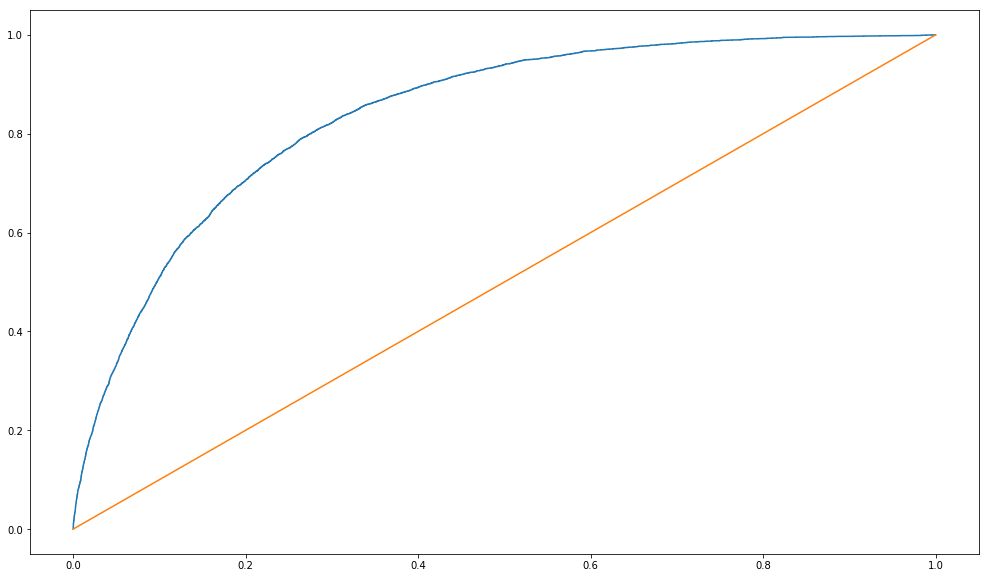

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
from random import random
%matplotlib inline
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predict)

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(y_test, predict))

In [39]:
#GradientBoostingClassifier  обучение на полной выборке

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=400, max_depth=5)
model.fit(train_cut, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
#XGBClassifier обучение на полной выборке

In [12]:
%%time
from xgboost import XGBClassifier
param={'max_depth':5, 'silent':1, 'objective': 'binary:logistic','colsample_bytree':0.7,'subsample':0.7,'min_child_weight':5}
param['nthread'] = 8
param['eval_metric'] = 'error'
param['n_estimators'] = 400
param['learning_rate'] = 0.1
model = XGBClassifier(**param)
model.fit(train_cut, y)

CPU times: user 7min 51s, sys: 8.65 s, total: 8min
Wall time: 1min


In [16]:
predict_test = model.predict_proba(test_cut)
result=pd.DataFrame()
result['id']=test['ID']
result['target']=predict_test[:,1]
result

,id,target
0,519130,0.270507
1,234045,0.005504
2,401256,0.004021
3,551070,0.004555
4,367285,0.004005
5,497998,0.008927
6,413082,0.068593
7,349893,0.002550
8,346337,0.113772
9,289979,0.002901


In [17]:
lab_result = '/data/home/sergey.antonov'
result.to_csv(os.path.join(lab_result,'lab04s.csv'),sep='\t',index=False)